In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

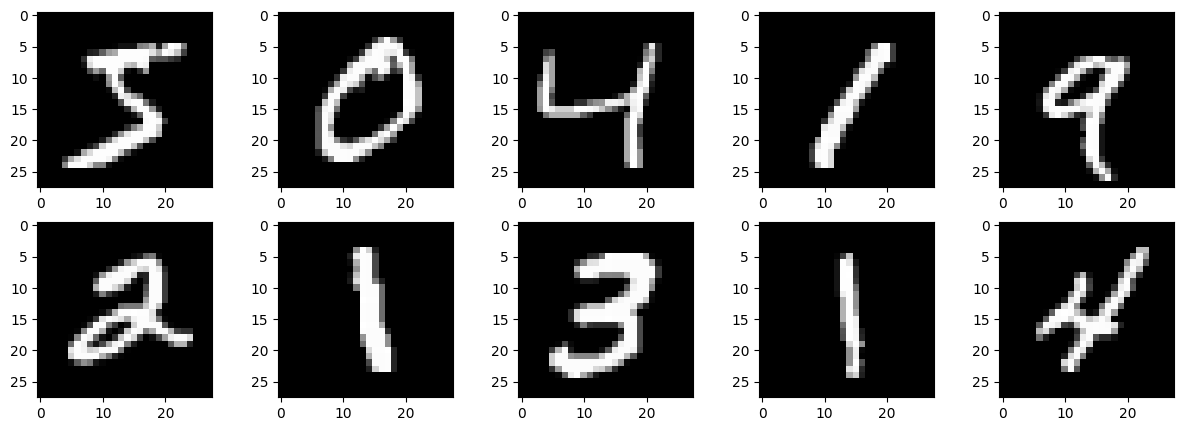

In [4]:
plt.figure(figsize = (15, 5))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[i], cmap = 'gray')

plt.show()

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(solver = 'lbfgs', multi_class = 'multinomial', max_iter = 1000))
])


In [6]:
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [7]:
pipe.fit(X_train_flat, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(max_iter=1000, multi_class='multinomial'))])

In [8]:
accuracy = pipe.score(X_test_flat, y_test)
print(f'Accuracy : {accuracy: .4f}')

Accuracy :  0.9216


In [11]:
y_pred = pipe.predict(X_test_flat)

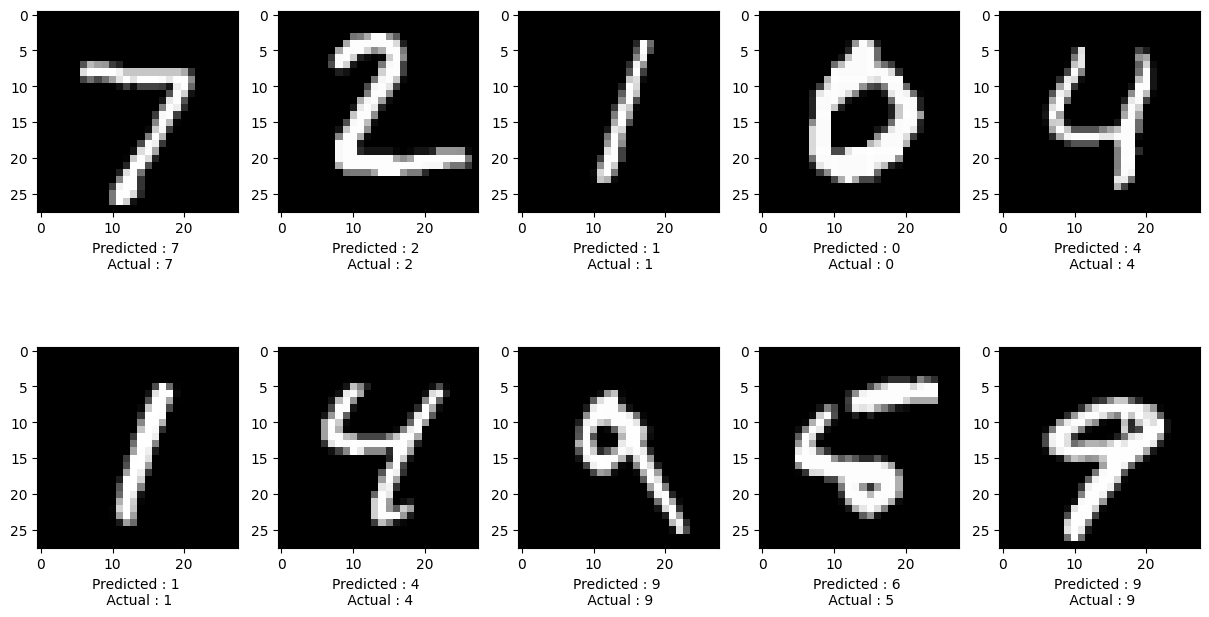

In [16]:
plt.figure(figsize = (15, 8))
for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_test[i], cmap = 'grey')
  plt.xlabel(f"Predicted : {y_pred[i]} \n Actual : {y_test[i]}")

plt.show()